<a href="https://colab.research.google.com/github/soranjan/Image-Classification/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
import os 
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize


target = []
images = []
flat_data = []

datadir = '/content/gdrive/MyDrive/PYTHON/Minor Project/Images'
categories = ["Fish","Cat"]

for i in categories:
  class_num = categories.index(i)
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(np.ndarray.flatten(img_resized))
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


In [7]:
np.unique(target,return_counts=True)

(array([0, 1]), array([72, 72]))

In [8]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {"C":[1,10,100,1000],"kernel":["linear"]},
              {"C":[1,10,100,1000],"gamma":[0.001,0.0001],"kernel":["rbf"]},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)


0.7954545454545454

In [11]:
confusion_matrix(y_pred,y_test)

array([[14,  4],
       [ 5, 21]])

In [12]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open("img_model.p","wb"))

In [13]:
model = pickle.load(open("img_model.p","rb"))

Enter your URLhttps://images.squarespace-cdn.com/content/v1/5c74288d9b8fe8141c2f96cd/1555288602717-ILN9Q2I0BE0JGPJC9SHC/ke17ZwdGBToddI8pDm48kHH9S2ID7_bpupQnTdrPcoF7gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z4YTzHvnKhyp6Da-NYroOW3ZGjoBKy3azqku80C789l0nQwvinDXPV4EYh2MRzm-RRB5rUELEv7EY2n0AZOrEupxpSyqbqKSgmzcCPWV5WMiQ/closup-of-cat-on-floor-julie-austin-pet-photography.jpg?format=1000w
(666, 1000, 3)
PREDICTED OUTPUT: Cat


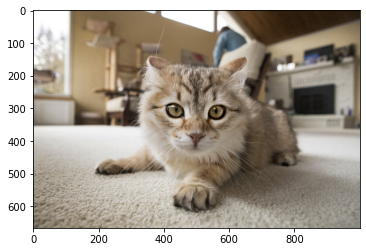

In [23]:
import matplotlib.pyplot as plt
flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f"PREDICTED OUTPUT: {y_out}")

In [15]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet        
from pyngrok import ngrok

In [21]:
%%writefile app.py
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image

st.set_option("deprecation.showfileUploaderEncoding",False)
st.title("Image Classifier")
st.text("Upload the Image")

model = pickle.load(open("img_model.p","rb"))

uploaded_file = st.file_uploader("Choose an image", type= "jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption= "Uploaded Image")

  if st.button("Predict"):
    categories = ["Fish","Cat"]
    st.write("Result")
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    plt.imshow(img)
    y_out = model.predict(flat_data)
    y_out = categories[y_out[0]]
    st.title(f"PREDICTED OUTPUT: {y_out}")

Overwriting app.py


In [18]:
!nohup streamlit run app.py &

url = ngrok.connect(port= "8501")
url

nohup: appending output to 'nohup.out'


'http://8346566ff101.ngrok.io'